In [1]:
import pandas as pd

In [2]:
df = pd.read_excel(r"C:\Users\91852\Downloads\DataScience Innomatics Tasks\data.xlsx", sheet_name=0)

### Structural Errors

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    234 non-null    object 
 1   StockCode    234 non-null    object 
 2   Description  234 non-null    object 
 3   Quantity     234 non-null    object 
 4   UnitPrice    234 non-null    float64
 5   Country      234 non-null    object 
dtypes: float64(1), object(5)
memory usage: 11.1+ KB


In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom
1,536365,71053,WHITE METAL LANTERN,#6,3.39,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,4.23,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,5.07,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,5.91,United Kingdom


In [5]:
df['Quantity']

0       6
1      #6
2       8
3       6
4       6
       ..
229    24
230    24
231    24
232    48
233    96
Name: Quantity, Length: 234, dtype: object

In [6]:
df['Quantity']= df['Quantity'].replace(r'[#&*-]',"", regex=True ).astype('int16')

In [7]:
df['Quantity']

0       6
1       6
2       8
3       6
4       6
       ..
229    24
230    24
231    24
232    48
233    96
Name: Quantity, Length: 234, dtype: int16

In [8]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
UnitPrice      0
Country        0
dtype: int64

### Standardization

In [9]:
def stdq(x):
    n = (x - df['Quantity'].mean())/df['Quantity'].std()
    return n

In [10]:
df['Quantity'].apply(stdq)

0     -0.329666
1     -0.329666
2     -0.291383
3     -0.329666
4     -0.329666
         ...   
229    0.014888
230    0.014888
231    0.014888
232    0.474294
233    1.393106
Name: Quantity, Length: 234, dtype: float64

In [11]:
def stdup(x):
    n = (x-df['UnitPrice'].mean())/df['UnitPrice'].std()
    return n

In [12]:
df['UnitPrice'].apply(stdup)

0     -0.299722
1     -0.056319
2      0.187085
3      0.430488
4      0.673892
         ...   
229    0.192880
230   -0.056319
231    0.047997
232   -0.609772
233   -0.676418
Name: UnitPrice, Length: 234, dtype: float64

### Transformation

In [13]:
df['Quantity'].mean()

23.22222222222222

In [14]:
df['Quantity'].median()

6.0

In [15]:
import numpy as np

In [16]:
np.reciprocal(df['Quantity']).mean(), np.reciprocal(df['Quantity']).median()

(0.05128205128205128, 0.0)

In [20]:
np.log10(df['Quantity']).mean(), np.log10(df['Quantity']).median()

C:\Users\91852\anaconda3\envs\Datascience\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


(0.9465505, 0.7781513)

In [21]:
#since the mean and median are closed values (when log function is applied), it now follows normal distribution

In [22]:
import matplotlib

<Axes: ylabel='Density'>

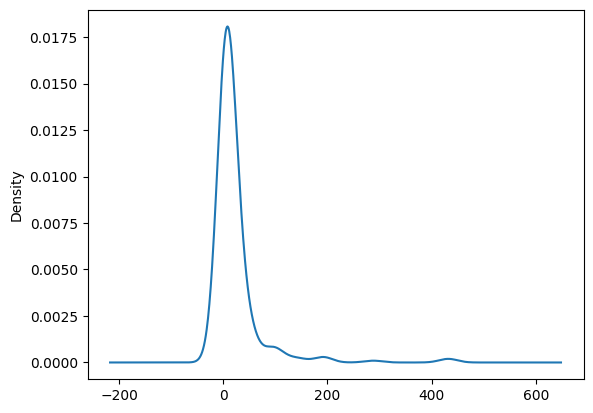

In [23]:
df['Quantity'].plot(kind ='kde')

In [24]:
df['Quantity']= np.log10(df['Quantity'])

C:\Users\91852\anaconda3\envs\Datascience\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: ylabel='Density'>

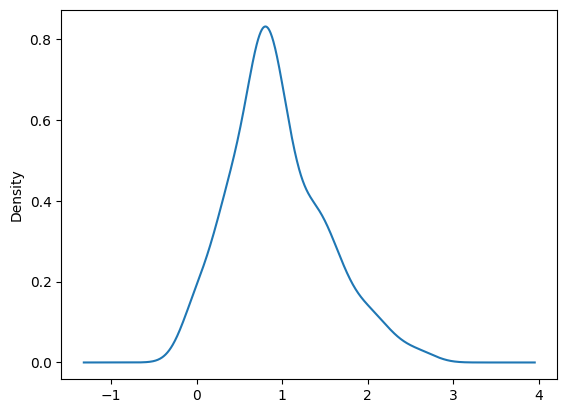

In [25]:
df['Quantity'].plot(kind ='kde')

<Axes: ylabel='Density'>

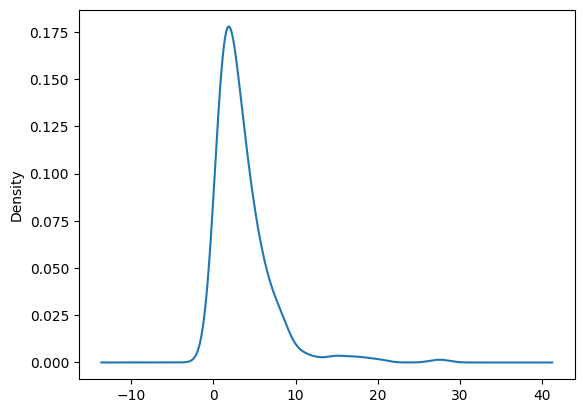

In [26]:
df['UnitPrice'].plot(kind = 'kde')

In [27]:
df['UnitPrice'] = np.log(df['UnitPrice'])

<Axes: ylabel='Density'>

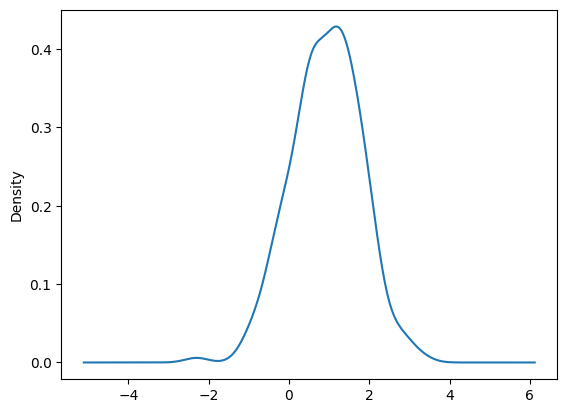

In [28]:
df['UnitPrice'].plot(kind = 'kde')

### Concatenation and merging

In [29]:
df2 = pd.read_excel(r"C:\Users\91852\Downloads\DataScience Innomatics Tasks\data.xlsx", sheet_name=1)

In [30]:
df

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,0.778151,0.936093,United Kingdom
1,536365,71053,WHITE METAL LANTERN,0.778151,1.220830,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,0.903090,1.442202,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,0.778151,1.623341,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,0.778151,1.776646,United Kingdom
...,...,...,...,...,...,...
229,536390,21485,RETROSPOT HEART HOT WATER BOTTLE,1.380211,1.446919,United Kingdom
230,536390,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,1.380211,1.220830,United Kingdom
231,536390,84030E,ENGLISH ROSE HOT WATER BOTTLE,1.380211,1.321756,United Kingdom
232,536390,22174,PHOTO CUBE,1.681241,0.392042,United Kingdom


In [31]:
df2

,InvoiceNo,CustomerID
0,536365,17850.0
1,536365,17850.0
2,536365,17850.0
3,536365,17850.0
4,536365,17850.0
...,...,...
541904,581587,12680.0
541905,581587,12680.0
541906,581587,12680.0
541907,581587,12680.0


In [32]:
pd.concat([df,df2], axis =0, ignore_index=True)

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,0.778151,0.936093,United Kingdom,NaN
1,536365,71053,WHITE METAL LANTERN,0.778151,1.220830,United Kingdom,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,0.903090,1.442202,United Kingdom,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,0.778151,1.623341,United Kingdom,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,0.778151,1.776646,United Kingdom,NaN
...,...,...,...,...,...,...,...
542138,581587,NaN,NaN,NaN,NaN,NaN,12680.0
542139,581587,NaN,NaN,NaN,NaN,NaN,12680.0
542140,581587,NaN,NaN,NaN,NaN,NaN,12680.0
542141,581587,NaN,NaN,NaN,NaN,NaN,12680.0


In [33]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'UnitPrice',
       'Country'],
      dtype='object')

In [34]:
df2.columns

Index(['InvoiceNo', 'CustomerID'], dtype='object')

In [35]:
pd.merge(df, df2, on ='InvoiceNo', how='outer')

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,0.778151,0.936093,United Kingdom,17850.0
1,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,0.778151,0.936093,United Kingdom,17850.0
2,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,0.778151,0.936093,United Kingdom,17850.0
3,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,0.778151,0.936093,United Kingdom,17850.0
4,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,0.778151,0.936093,United Kingdom,17850.0
...,...,...,...,...,...,...,...
545738,581587,NaN,NaN,NaN,NaN,NaN,12680.0
545739,581587,NaN,NaN,NaN,NaN,NaN,12680.0
545740,581587,NaN,NaN,NaN,NaN,NaN,12680.0
545741,581587,NaN,NaN,NaN,NaN,NaN,12680.0


In [36]:
pd.merge(df, df2, on = 'InvoiceNo', how = 'left')

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,0.778151,0.936093,United Kingdom,17850.0
1,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,0.778151,0.936093,United Kingdom,17850.0
2,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,0.778151,0.936093,United Kingdom,17850.0
3,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,0.778151,0.936093,United Kingdom,17850.0
4,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,0.778151,0.936093,United Kingdom,17850.0
...,...,...,...,...,...,...,...
4064,536390,22969,HOMEMADE JAM SCENTED CANDLES,1.982271,0.223144,United Kingdom,17511.0
4065,536390,22969,HOMEMADE JAM SCENTED CANDLES,1.982271,0.223144,United Kingdom,17511.0
4066,536390,22969,HOMEMADE JAM SCENTED CANDLES,1.982271,0.223144,United Kingdom,17511.0
4067,536390,22969,HOMEMADE JAM SCENTED CANDLES,1.982271,0.223144,United Kingdom,17511.0
